In [90]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error,classification_report
from sklearn.linear_model import LogisticRegression

In [92]:
#load data

df = pd.read_csv('/content/drive/My Drive/csv/placementdata.csv')
df


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [93]:
#check for null value

df.isnull().sum()



,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [94]:
#checking unique value

df['ExtracurricularActivities'].unique()


array(['No', 'Yes'], dtype=object)

In [95]:
df['PlacementTraining'].unique()

array(['No', 'Yes'], dtype=object)

In [96]:
df['PlacementStatus'].unique()

array(['NotPlaced', 'Placed'], dtype=object)

In [97]:
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [98]:
d = {'Yes': 1, 'No': 0}
df['ExtracurricularActivities'] = df['ExtracurricularActivities'].map(d)
df['PlacementTraining'] = df['PlacementTraining'].map(d)

d = {'Placed': 1, 'NotPlaced': 0}
df['PlacementStatus'] = df['PlacementStatus'].map(d)

In [99]:
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,1,0,85,66,0
9996,9997,7.4,0,1,0,90,4.8,0,0,84,67,1
9997,9998,8.4,1,3,0,70,4.8,1,1,79,81,1
9998,9999,8.9,0,3,2,87,4.8,1,1,71,85,1


In [110]:
df = df.drop(columns=['StudentID'])

In [111]:
X = df.drop(columns=['PlacementStatus'])
Y = df['PlacementStatus']

In [112]:
print(X)

      CGPA  Internships  Projects  Workshops/Certifications  \
0      7.5            1         1                         1   
1      8.9            0         3                         2   
2      7.3            1         2                         2   
3      7.5            1         1                         2   
4      8.3            1         2                         2   
...    ...          ...       ...                       ...   
9995   7.5            1         1                         2   
9996   7.4            0         1                         0   
9997   8.4            1         3                         0   
9998   8.9            0         3                         2   
9999   8.4            0         1                         1   

      AptitudeTestScore  SoftSkillsRating  ExtracurricularActivities  \
0                    65               4.4                          0   
1                    90               4.0                          1   
2                    82    

In [113]:
print(Y)

0       0
1       1
2       0
3       1
4       1
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: PlacementStatus, Length: 10000, dtype: int64


In [120]:
correlation = df.corr()
correlation

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
CGPA,1.000000,0.280601,0.435928,0.349686,0.461250,0.383547,0.444130,0.251628,0.404971,0.462313,0.423131
Internships,0.280601,1.000000,0.309196,0.279110,0.320725,0.273691,0.274960,0.153547,0.279837,0.317149,0.260340
Projects,0.435928,0.309196,1.000000,0.377865,0.540339,0.450294,0.491430,0.293709,0.499421,0.535708,0.475186
Workshops/Certifications,0.349686,0.279110,0.377865,1.000000,0.388061,0.342397,0.373926,0.180333,0.373045,0.418442,0.362268
AptitudeTestScore,0.461250,0.320725,0.540339,0.388061,1.000000,0.515400,0.474130,0.314772,0.513044,0.565105,0.521744
SoftSkillsRating,0.383547,0.273691,0.450294,0.342397,0.515400,1.000000,0.448049,0.235571,0.430734,0.466912,0.427284
ExtracurricularActivities,0.444130,0.274960,0.491430,0.373926,0.474130,0.448049,1.000000,0.327158,0.517850,0.533572,0.482491
PlacementTraining,0.251628,0.153547,0.293709,0.180333,0.314772,0.235571,0.327158,1.000000,0.257440,0.325434,0.323659
SSC_Marks,0.404971,0.279837,0.499421,0.373045,0.513044,0.430734,0.517850,0.257440,1.000000,0.524916,0.469763
HSC_Marks,0.462313,0.317149,0.535708,0.418442,0.565105,0.466912,0.533572,0.325434,0.524916,1.000000,0.505746


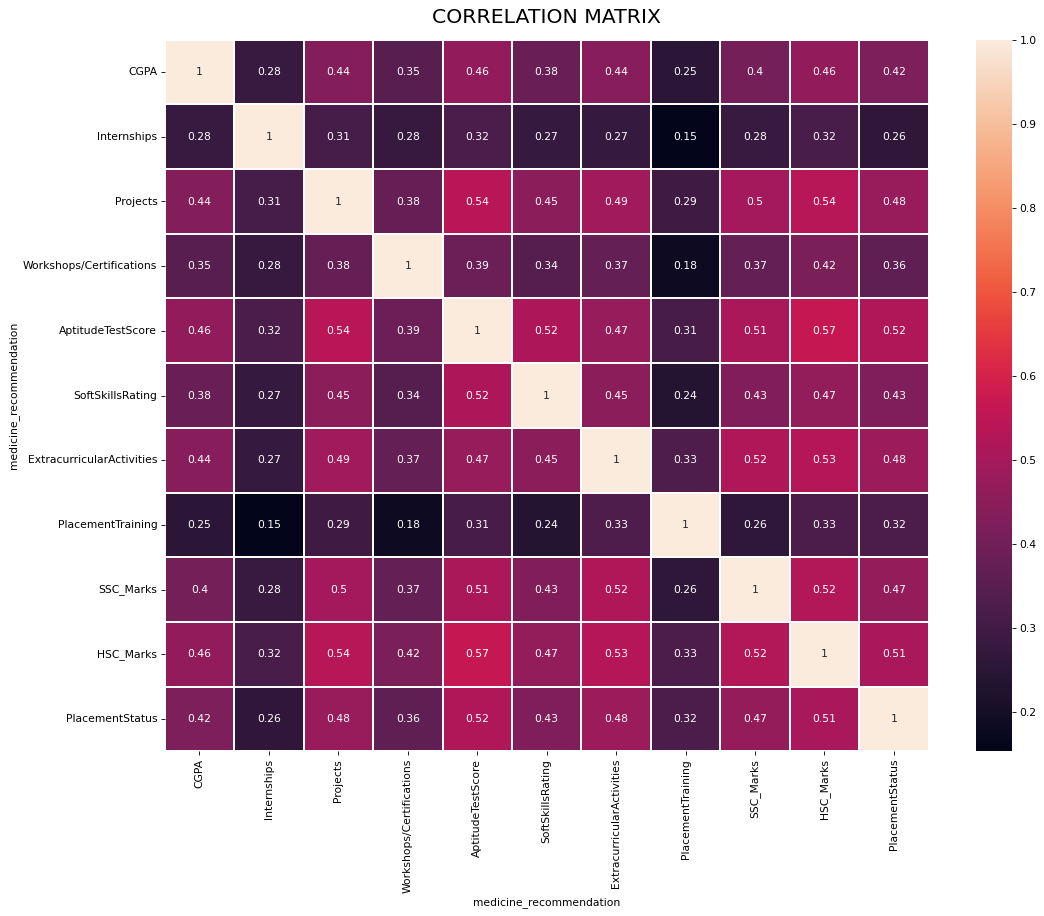

In [121]:
plt.figure(figsize=(16,12), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=16)
plt.xlabel('medicine_recommendation')
plt.ylabel('medicine_recommendation')
plt.xticks(rotation=90)
plt.show()

# Decision Tree

In [134]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)

In [119]:
#features = ['CGPA' , 'Internships', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating', 'ExtracurricularActivities' , 'PlacementTraining', 'SSC_Marks', 'HSC_Marks'  ]
#tree.plot_tree(dtree, feature_names=features)

In [135]:
y_pred = dtree.predict(X)

print(y_pred)

[0 1 0 ... 1 1 0]


In [136]:
# Calculate accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #importing the required metrics functions
accuracy = accuracy_score(Y, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(Y, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(Y, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(Y, y_pred)
print("F1-Score:", f1)

Accuracy: 0.9992
Precision: 1.0
Recall (Sensitivity): 0.9980938765785085
F1-Score: 0.9990460290961126


# SVM

In [125]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [126]:
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [ ]:
# Generate predictions on the test set (X_test)
y_pred = model.predict(X_test)

print(y_pred)

In [133]:

# Calculate accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score #importing the required metrics functions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall (sensitivity)
recall = recall_score(y_test, y_pred)
print("Recall (Sensitivity):", recall)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)
print("F1-Score:", f1)

[0 0 0 ... 1 1 0]
Accuracy: 0.7945
Precision: 0.7432905484247374
Recall (Sensitivity): 0.7693236714975845
F1-Score: 0.7560830860534125
